<a href="https://colab.research.google.com/github/harshysyrup/CODSOFT/blob/main/Project002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⛴ **# Task -1 TITANIC SURVIVAL PREDICTION**

---
Author: Harsh Surana

Batch:April

Domain:Data Science

Aim: Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not.


***IMPORTING ALL THE ESSENTIAL LIBRABIES***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns

***CONNECTING DATA BASE FROM GOOGLE DRIVE***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
read_data = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv', encoding='latin1', sep=',', engine='python')
read_data.columns = ['PassengerId','Survived',	'Pclass',	'Name','Sex','Age','SibSp','Parch',	'Ticket',	'Fare','Cabin','Embarked']
read_data.dropna(inplace=True)
read_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


***HANDLING MISSING VALUES***

In [ ]:
missing_values = read_data.isnull().sum()
print("Missing values:\n", missing_values)



Missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


***VISUALIZATION OF DATA***

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB
None

Basic Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257   35.674426    0.464481

<ipython-input-7-a9569fcfbd49>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=read_data, palette='coolwarm')


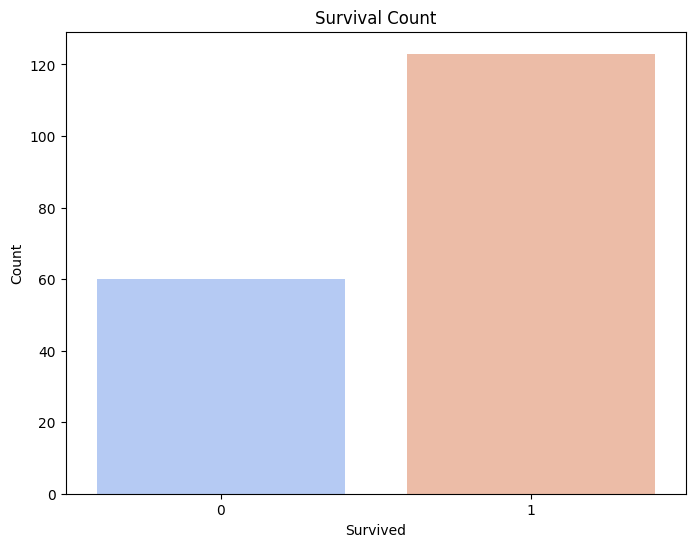

<ipython-input-7-a9569fcfbd49>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=read_data, palette='viridis')


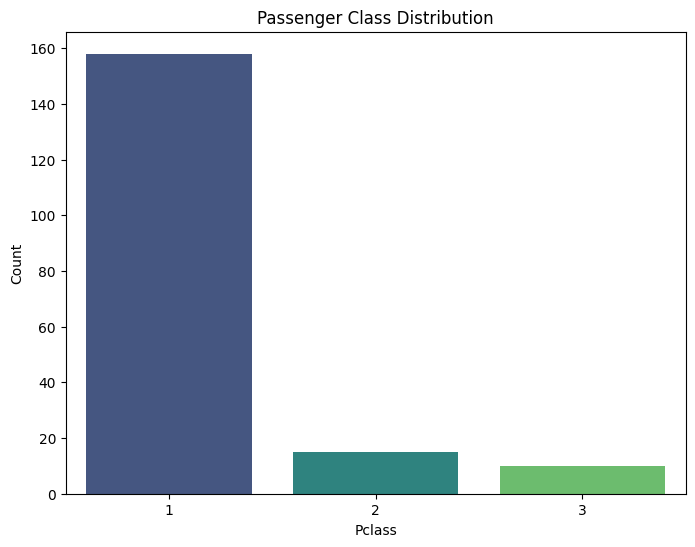

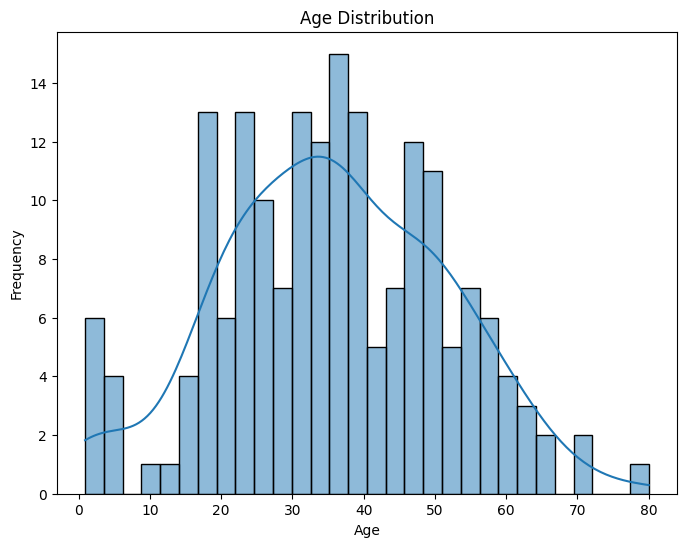

<ipython-input-7-a9569fcfbd49>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=read_data, palette='viridis')


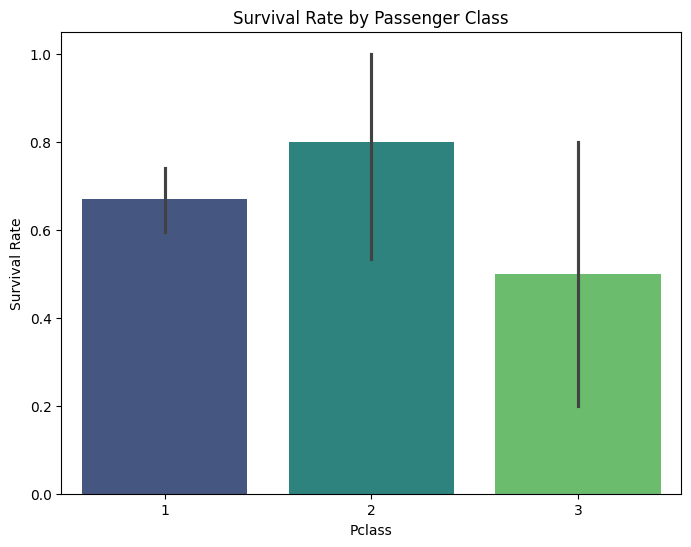

<ipython-input-7-a9569fcfbd49>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=read_data, palette='coolwarm')


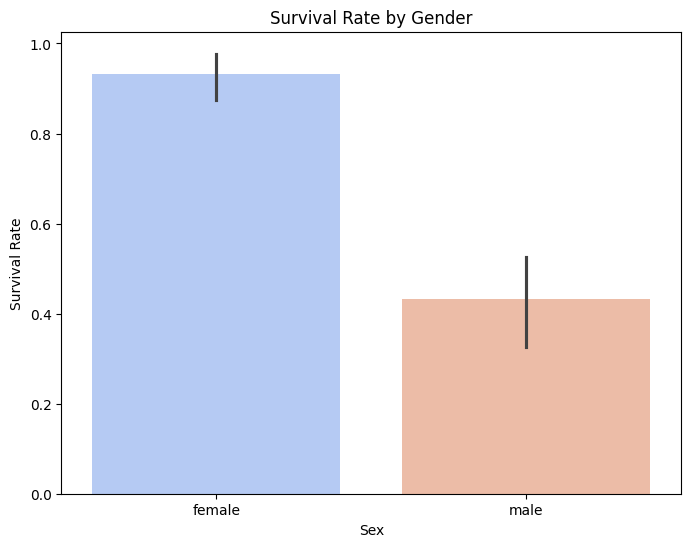

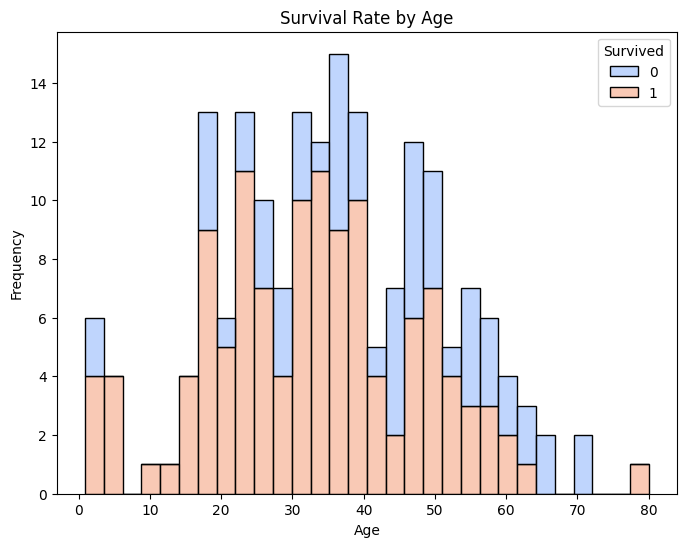

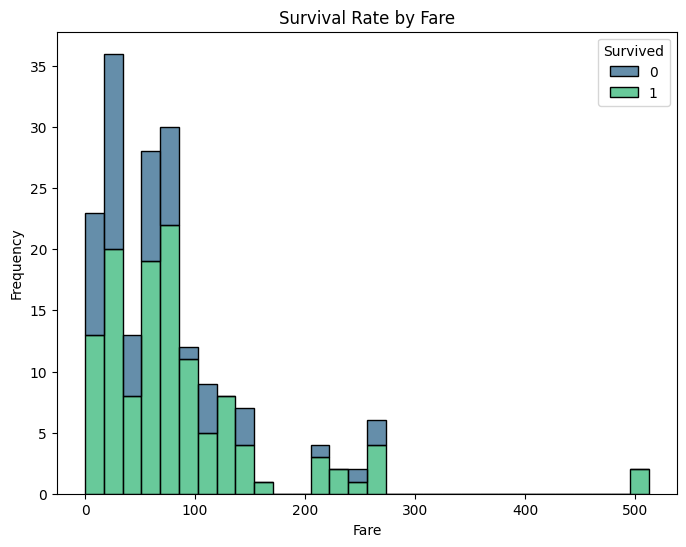

<ipython-input-7-a9569fcfbd49>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=read_data, palette='viridis')


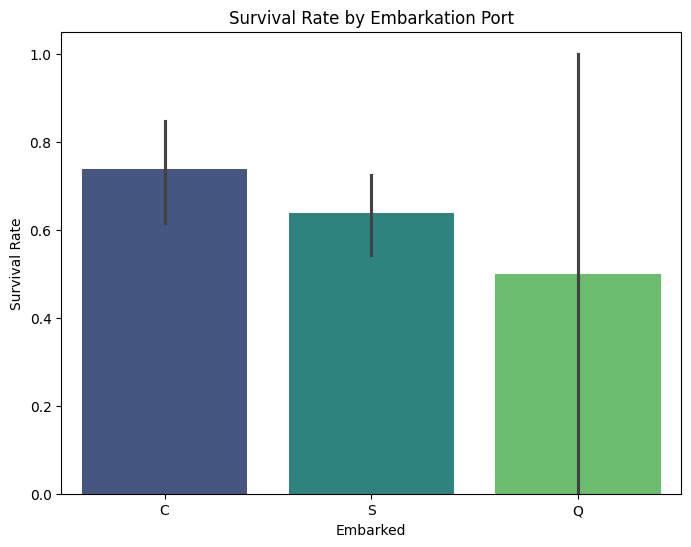

In [ ]:

read_data = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv', encoding='latin1', sep=',', engine='python')
read_data.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

read_data.dropna(inplace=True)

print("Basic Information:")
print(read_data.info())

print("\nBasic Statistics:")
print(read_data.describe())

print("\nFirst Few Rows:")
print(read_data.head())

survival_count = read_data['Survived'].value_counts()
print("\nSurvival Count:")
print(survival_count)

plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=read_data, palette='coolwarm')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=read_data, palette='viridis')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(read_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=read_data, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=read_data, palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=read_data, x='Age', hue='Survived', multiple='stack', bins=30, palette='coolwarm')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=read_data, x='Fare', hue='Survived', multiple='stack', bins=30, palette='viridis')
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=read_data, palette='viridis')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()


***ENCODING OF DATA***

In [ ]:

read_data = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv', encoding='latin1', sep=',', engine='python')
read_data.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

print("Columns in the dataset:", read_data.columns)

if 'SibSp' in read_data.columns and 'Parch' in read_data.columns:

    read_data['Sex'] = read_data['Sex'].map({'male': 0, 'female': 1})

    read_data['Embarked'] = read_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    read_data['FamilySize'] = read_data['SibSp'] + read_data['Parch'] + 1

    read_data.drop(columns=['Name', 'Ticket', 'SibSp', 'Parch'], inplace=True)

    print(read_data.head())
else:
    print("Required columns are not present in the dataset.")


Columns in the dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  Sex   Age     Fare Cabin  Embarked  \
0            1         0       3    0  22.0   7.2500   NaN       0.0   
1            2         1       1    1  38.0  71.2833   C85       1.0   
2            3         1       3    1  26.0   7.9250   NaN       0.0   
3            4         1       1    1  35.0  53.1000  C123       0.0   
4            5         0       3    0  35.0   8.0500   NaN       0.0   

   FamilySize  
0           2  
1           2  
2           1  
3           2  
4           1  


***SPLITTING DATASET INTO TRAINING AND TESTING***

In [ ]:
from sklearn.model_selection import train_test_split

X = read_data.drop(columns=['Survived', 'PassengerId'])
y = read_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (712, 7)
Testing set shape: (179, 7)


***Model Selection and Training***

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd


read_data = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv', encoding='latin1', sep=',', engine='python')
read_data.columns = ['PassengerId','Survived', 'Pclass', 'Name','Sex','Age','SibSp','Parch', 'Ticket', 'Fare','Cabin','Embarked']


read_data.dropna(inplace=True)

label_encoder = LabelEncoder()
read_data['Sex'] = label_encoder.fit_transform(read_data['Sex'])


read_data['Embarked'] = label_encoder.fit_transform(read_data['Embarked'])

read_data['Cabin_encoded'] = label_encoder.fit_transform(read_data['Cabin'])

read_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

X = read_data.drop(columns=['Survived'])
y = read_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)


log_reg_preds = log_reg.predict(X_test)
rf_clf_preds = rf_clf.predict(X_test)
gb_clf_preds = gb_clf.predict(X_test)


log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
rf_clf_accuracy = accuracy_score(y_test, rf_clf_preds)
gb_clf_accuracy = accuracy_score(y_test, gb_clf_preds)

print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_clf_accuracy:.4f}")
print(f"Gradient Boosting Accuracy: {gb_clf_accuracy:.4f}")

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, log_reg_preds))

print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test, rf_clf_preds))

print("\nClassification Report for Gradient Boosting Classifier:")
print(classification_report(y_test, gb_clf_preds))


Logistic Regression Accuracy: 0.7297
Random Forest Accuracy: 0.7838
Gradient Boosting Accuracy: 0.7838

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.74      0.87      0.80        23

    accuracy                           0.73        37
   macro avg       0.72      0.68      0.69        37
weighted avg       0.73      0.73      0.72        37


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.78      0.91      0.84        23

    accuracy                           0.78        37
   macro avg       0.79      0.74      0.75        37
weighted avg       0.79      0.78      0.77        37


Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.75      0

***Hyperparameter Tuning***

In [ ]:
from sklearn.model_selection import GridSearchCV


log_reg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
rf_clf_param_grid = {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 10, 20, 30]}
gb_clf_param_grid = {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2, 0.3], 'max_depth': [3, 5, 7]}


log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), log_reg_param_grid, cv=5)
rf_clf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_clf_param_grid, cv=5)
gb_clf_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_clf_param_grid, cv=5)

log_reg_grid.fit(X_train, y_train)
rf_clf_grid.fit(X_train, y_train)
gb_clf_grid.fit(X_train, y_train)


log_reg_best_params = log_reg_grid.best_params_
log_reg_best_score = log_reg_grid.best_score_

rf_clf_best_params = rf_clf_grid.best_params_
rf_clf_best_score = rf_clf_grid.best_score_

gb_clf_best_params = gb_clf_grid.best_params_
gb_clf_best_score = gb_clf_grid.best_score_

print("Best Hyperparameters for Logistic Regression:", log_reg_best_params)
print("Best Score for Logistic Regression:", log_reg_best_score)

print("Best Hyperparameters for Random Forest Classifier:", rf_clf_best_params)
print("Best Score for Random Forest Classifier:", rf_clf_best_score)

print("Best Hyperparameters for Gradient Boosting Classifier:", gb_clf_best_params)
print("Best Score for Gradient Boosting Classifier:", gb_clf_best_score)


Best Hyperparameters for Logistic Regression: {'C': 0.1}
Best Score for Logistic Regression: 0.7266666666666666
Best Hyperparameters for Random Forest Classifier: {'max_depth': None, 'n_estimators': 100}
Best Score for Random Forest Classifier: 0.76
Best Hyperparameters for Gradient Boosting Classifier: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 300}
Best Score for Gradient Boosting Classifier: 0.76


***Final Model Evaluation***

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


tuned_log_reg = LogisticRegression(C=0.1, max_iter=1000, random_state=42)
tuned_rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
tuned_gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.3, max_depth=3, random_state=42)


tuned_log_reg.fit(X_train, y_train)
tuned_rf_clf.fit(X_train, y_train)
tuned_gb_clf.fit(X_train, y_train)


tuned_log_reg_preds = tuned_log_reg.predict(X_test)
tuned_rf_clf_preds = tuned_rf_clf.predict(X_test)
tuned_gb_clf_preds = tuned_gb_clf.predict(X_test)


tuned_log_reg_accuracy = accuracy_score(y_test, tuned_log_reg_preds)
tuned_rf_clf_accuracy = accuracy_score(y_test, tuned_rf_clf_preds)
tuned_gb_clf_accuracy = accuracy_score(y_test, tuned_gb_clf_preds)

print(f"Tuned Logistic Regression Accuracy: {tuned_log_reg_accuracy:.4f}")
print(f"Tuned Random Forest Accuracy: {tuned_rf_clf_accuracy:.4f}")
print(f"Tuned Gradient Boosting Accuracy: {tuned_gb_clf_accuracy:.4f}")

print("\nClassification Report for Tuned Logistic Regression:")
print(classification_report(y_test, tuned_log_reg_preds))

print("\nClassification Report for Tuned Random Forest Classifier:")
print(classification_report(y_test, tuned_rf_clf_preds))

print("\nClassification Report for Tuned Gradient Boosting Classifier:")
print(classification_report(y_test, tuned_gb_clf_preds))


Tuned Logistic Regression Accuracy: 0.6757
Tuned Random Forest Accuracy: 0.7838
Tuned Gradient Boosting Accuracy: 0.7568

Classification Report for Tuned Logistic Regression:
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        14
           1       0.69      0.87      0.77        23

    accuracy                           0.68        37
   macro avg       0.66      0.61      0.61        37
weighted avg       0.67      0.68      0.65        37


Classification Report for Tuned Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.78      0.91      0.84        23

    accuracy                           0.78        37
   macro avg       0.79      0.74      0.75        37
weighted avg       0.79      0.78      0.77        37


Classification Report for Tuned Gradient Boosting Classifier:
              precision    recall  f1-score   sup

***BEST-PERFORMING MODEL***

In [ ]:

import joblib

rf_clf.fit(X, y)


joblib.dump(rf_clf, 'random_forest_model.pkl')



['random_forest_model.pkl']

***DATASET SEARCH ENGINE***

Enter the ticket number to enquire about: 17463
Passenger Details:
   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
6            7         0       1  McCarthy, Mr. Timothy J  male  54.0      0   

   Parch Ticket     Fare Cabin Embarked  
6      0  17463  51.8625   E46        S  


<ipython-input-22-da1099545c59>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=passenger_data, palette='viridis')
<ipython-input-22-da1099545c59>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=passenger_data, palette='coolwarm')
<ipython-input-22-da1099545c59>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=passenger_data, palette='viridis')
<ipython-input-22-da1099545c59>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

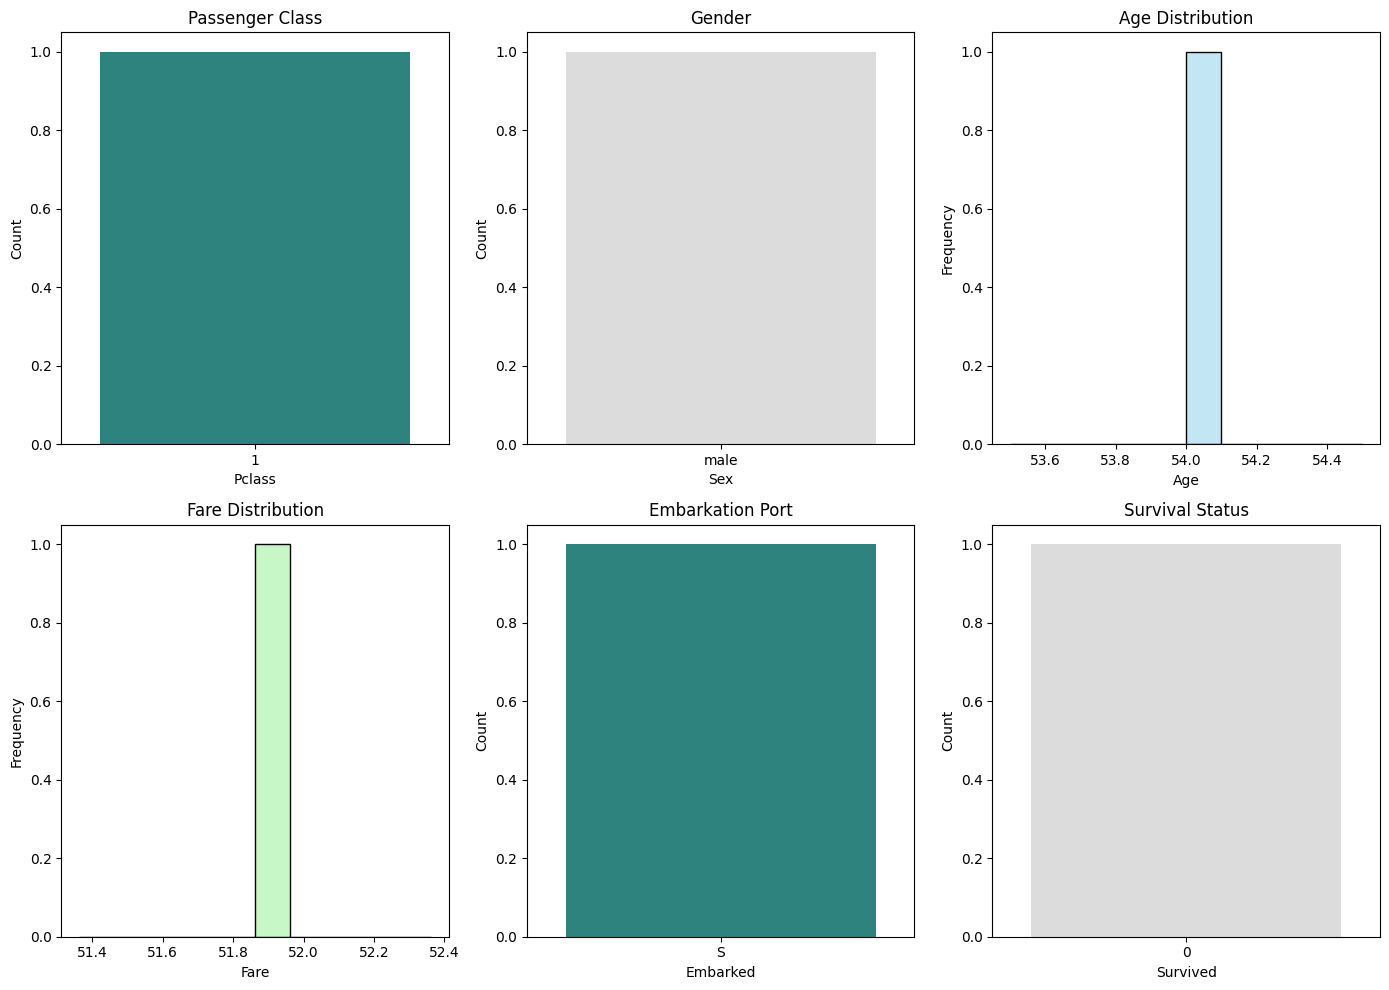

In [ ]:

read_data = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv', encoding='latin1', sep=',', engine='python')
read_data.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
read_data.dropna(inplace=True)

def visualize_passenger_details(ticket_number):

    passenger_data = read_data[read_data['Ticket'] == ticket_number]

    if passenger_data.empty:
        print(f"No passenger found with ticket number: {ticket_number}")
        return

    print("Passenger Details:")
    print(passenger_data)


    plt.figure(figsize=(14, 10))


    plt.subplot(2, 3, 1)
    sns.countplot(x='Pclass', data=passenger_data, palette='viridis')
    plt.title('Passenger Class')
    plt.xlabel('Pclass')
    plt.ylabel('Count')

    plt.subplot(2, 3, 2)
    sns.countplot(x='Sex', data=passenger_data, palette='coolwarm')
    plt.title('Gender')
    plt.xlabel('Sex')
    plt.ylabel('Count')


    plt.subplot(2, 3, 3)
    sns.histplot(passenger_data['Age'], bins=10, kde=True, color='skyblue')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')


    plt.subplot(2, 3, 4)
    sns.histplot(passenger_data['Fare'], bins=10, kde=True, color='lightgreen')
    plt.title('Fare Distribution')
    plt.xlabel('Fare')
    plt.ylabel('Frequency')

    plt.subplot(2, 3, 5)
    sns.countplot(x='Embarked', data=passenger_data, palette='viridis')
    plt.title('Embarkation Port')
    plt.xlabel('Embarked')
    plt.ylabel('Count')

    plt.subplot(2, 3, 6)
    sns.countplot(x='Survived', data=passenger_data, palette='coolwarm')
    plt.title('Survival Status')
    plt.xlabel('Survived')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

ticket_number = input("Enter the ticket number to enquire about: ")
visualize_passenger_details(ticket_number)

